In [1]:
! pip install tf-nightly-2.0-preview

    100% |████████████████████████████████| 77.9MB 445kB/s 
    100% |████████████████████████████████| 3.2MB 10.8MB/s 
    100% |████████████████████████████████| 348kB 23.0MB/s 
    100% |████████████████████████████████| 61kB 24.9MB/s 


In [2]:
import tensorflow as tf
print("You have version", tf.__version__)
#assert tf.__version__ >= "2.0" # TensorFlow ≥ 2.0 required

You have version 2.0.0-dev20190212


In [0]:
import numpy as np

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten
from matplotlib import pyplot as plt

In [4]:
#load dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255
x_test = x_test / 255

11493376/11490434==============================] - 0s 0us/step


In [0]:
#batch size & shuffle data
BATCH_SIZE = 128
BUFFER_SIZE = len(x_train)

mnist_train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
mnist_test = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)

In [0]:
#define model: Linear Model
class MyModel1(Model):
  def __init__(self):
    super(MyModel1, self).__init__()
    self.flatten = Flatten()
    #self.d1 = Dense(128, activation='relu')
    self.d1 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    #x = self.d1(x)
    return self.d1(x)
  
model1 = MyModel1()

In [0]:
#Choose optimizer
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam()

In [0]:
train_loss_metric = tf.keras.metrics.Mean(name='train_loss')
test_loss_metric = tf.keras.metrics.Mean(name='test_loss')

train_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [0]:
#Train the model using GradientTape
def train_step(images, labels):
  with tf.GradientTape() as tape:    
    # Forward pass
    predictions = model1(images)
    train_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Backward pass
  gradients = tape.gradient(train_loss, model1.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model1.trainable_variables))

  # Record results
  train_loss_metric(train_loss)
  train_accuracy_metric(labels, predictions)

In [0]:
def test_step(images, labels):
  predictions = model1(images)
  test_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Record results
  test_loss_metric(test_loss)
  test_accuracy_metric(labels, predictions)

In [11]:
EPOCHS = 10

for epoch in range(EPOCHS):
  for images, labels in mnist_train:
    train_step(images, labels)
  
  for test_images, test_labels in mnist_test:
    test_step(test_images, test_labels)
  
  template = 'Epoch {}, Loss: {:.4f}, Accuracy: {:.2f}, Test loss: {:.4f}, Test accuracy: {:.2f}'
  print (template.format(epoch +1, 
                         train_loss_metric.result(), 
                         train_accuracy_metric.result() * 100, 
                         test_loss_metric.result(), 
                         test_accuracy_metric.result() * 100))

Epoch 1, Loss: 0.6732, Accuracy: 83.44, Test loss: 0.3817, Test accuracy: 90.17
Epoch 2, Loss: 0.5174, Accuracy: 86.86, Test loss: 0.3501, Test accuracy: 90.79
Epoch 3, Loss: 0.4514, Accuracy: 88.30, Test loss: 0.3320, Test accuracy: 91.11
Epoch 4, Loss: 0.4134, Accuracy: 89.15, Test loss: 0.3202, Test accuracy: 91.35
Epoch 5, Loss: 0.3883, Accuracy: 89.72, Test loss: 0.3117, Test accuracy: 91.55
Epoch 6, Loss: 0.3702, Accuracy: 90.13, Test loss: 0.3053, Test accuracy: 91.68
Epoch 7, Loss: 0.3564, Accuracy: 90.45, Test loss: 0.3003, Test accuracy: 91.78
Epoch 8, Loss: 0.3456, Accuracy: 90.71, Test loss: 0.2963, Test accuracy: 91.86
Epoch 9, Loss: 0.3367, Accuracy: 90.92, Test loss: 0.2930, Test accuracy: 91.93
Epoch 10, Loss: 0.3292, Accuracy: 91.09, Test loss: 0.2902, Test accuracy: 91.98


In [12]:
model1.layers

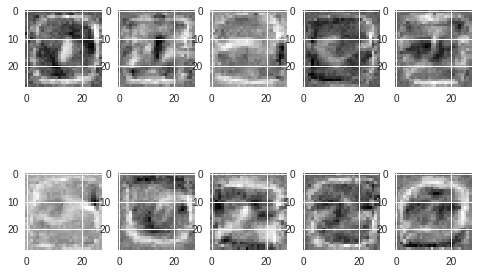

In [13]:
#visualize weights
weights=model1.get_weights()
weight=np.array(weights[0])
#print(weight.shape)
w=weight.reshape(28,28,10)
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(w[:,:,i])
plt.show()